## Evaluate With out PCA

In [ ]:
import pandas as pd
df = pd.read_csv("../Data/Cleaned_Data.csv")
df

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaled_features = scaler.fit_transform(df)

In [3]:
from sklearn.cluster import KMeans

kmeans_params = {"init": "random", "n_init": 10, "max_iter": 350, "random_state": 42}

inertia_values = [
    KMeans(n_clusters=k, **kmeans_params).fit(scaled_features).inertia_
    for k in range(1, 11)
]

In [6]:
from kneed import KneeLocator
k1 = KneeLocator(range(1, 11), inertia_values, curve="convex", direction="decreasing")
elbow_point = k1.elbow
print(f"The optimal number of clusters is: {elbow_point}")

The optimal number of clusters is: 4


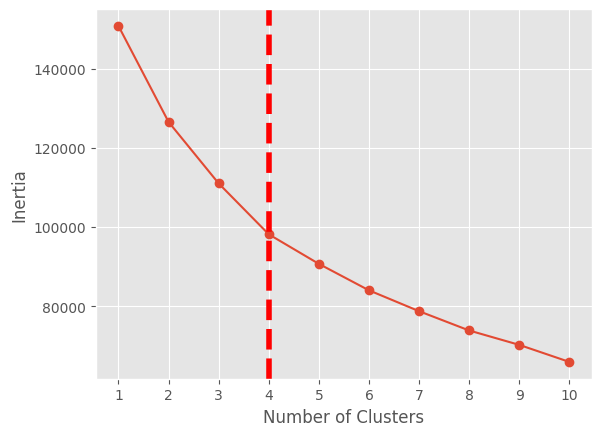

In [7]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot (range (1,11), inertia_values , marker = 'o')
plt.xticks (range (1, 11))
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia")
plt.axvline (x = elbow_point, color = "red", label = "axvline - full height",linewidth = 4, linestyle ="--")
plt.show ()

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 3)
kmeans = kmeans.fit (df)

centroids = kmeans.cluster_centers_
print (centroids)

clusters = kmeans.labels_
print (clusters)

[[8.97938116e+02 8.64596977e-01 6.20166297e+02 3.23088489e+02
  2.97369091e+02 5.19075066e+02 4.69623555e-01 1.59951520e-01
  3.51766038e-01 1.08833968e-01 2.31524664e+00 1.09245142e+01
  2.88393477e+03 1.00964362e+03 5.71046794e+02 1.58696942e-01
  1.14473842e+01]
 [3.62837083e+03 9.40959948e-01 1.90203420e+03 1.19990510e+03
  7.02471210e+02 2.41046083e+03 5.48933013e-01 3.32217701e-01
  3.95987423e-01 2.21447356e-01 6.20862309e+00 2.54302272e+01
  9.37343743e+03 3.64388039e+03 1.64712722e+03 1.39334550e-01
  1.17362077e+01]
 [5.79597140e+03 9.55799379e-01 2.42525972e+04 1.86993007e+04
  5.55329655e+03 2.97698377e+03 8.93103414e-01 7.63218448e-01
  7.28735621e-01 9.19540000e-02 6.41379310e+00 1.12379310e+02
  1.66241379e+04 2.74616231e+04 3.13727697e+03 4.66170310e-01
  1.19310345e+01]]
[0 1 1 ... 0 0 0]


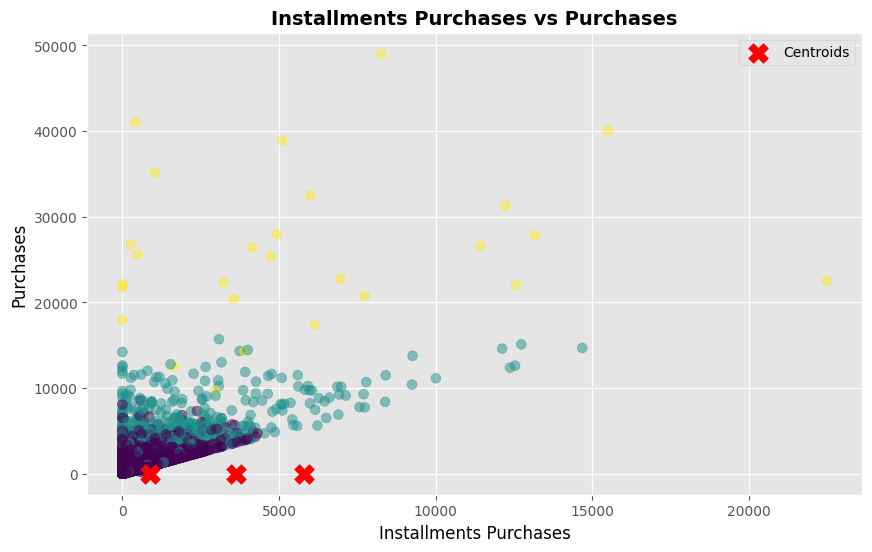

In [9]:
df_with_clusters = df.copy()

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(df["Installments_Purchases"], df["Purchases"], 
                     c=kmeans.labels_.astype(float), s=50, alpha=0.5, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker='X', label='Centroids')

ax.set_title("Installments Purchases vs Purchases", weight="bold", color="black", fontsize=14)
ax.set_xlabel("Installments Purchases", color="black", fontsize=12)
ax.set_ylabel("Purchases", color="black", fontsize=12)

ax.legend()
ax.grid(True)

plt.show()

In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

inertia = kmeans.inertia_
print(f"Inertia: {inertia}")
silhouette_avg = silhouette_score(df, clusters)
print(f"Silhouette Score: {silhouette_avg}")
calinski_harabasz = calinski_harabasz_score(df, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
davies_bouldin = davies_bouldin_score(df, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Inertia: 236812654597.93604
Silhouette Score: 0.48691315567354465
Calinski-Harabasz Index: 2893.197528224467
Davies-Bouldin Index: 1.0448250201256986


## Evaluate With PCA

## Evaluate With Hierchal Clusturing